Cluster and GT comparison

GMM and GT comparison

In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
pca_result =pd.read_csv('pca_dataframe.csv', low_memory=False).to_numpy()
df = pd.DataFrame(pca_result[:,:2])
y = pd.read_csv('ddos_dataset.csv', low_memory=False)['label'].to_numpy()

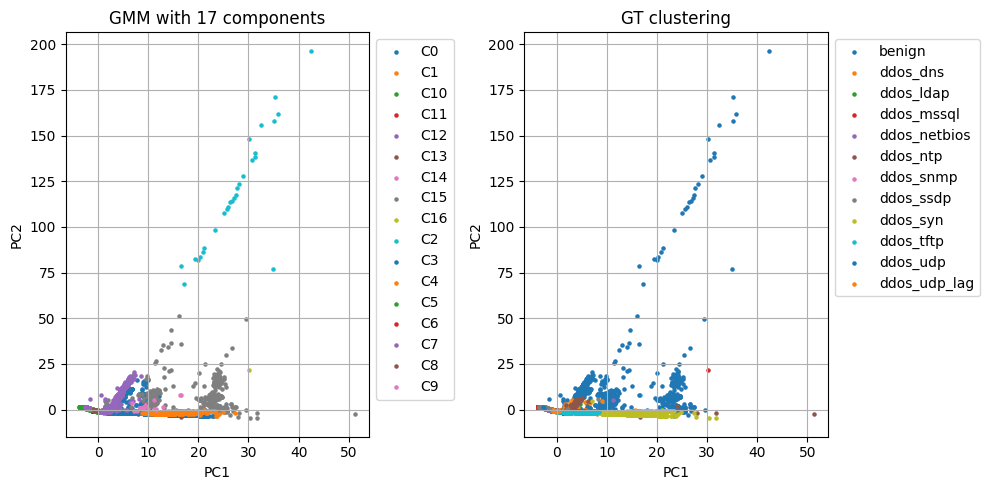

In [3]:
gmm = GaussianMixture(n_components=17)
labels = gmm.fit_predict(pca_result)
df['cid_gmm'] = [f'C{x}' for x in labels]
df['label'] = y.reshape(-1)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in np.unique(df.cid_gmm):
    subdf = df[df.cid_gmm == i]
    ax[0].scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title(f'GMM with 17 components')
ax[0].grid()

for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax[1].scatter(subdf[0], subdf[1], label=i, s=5)

lgnd = ax[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GT clustering')
ax[1].grid()
plt.tight_layout()
plt.show()

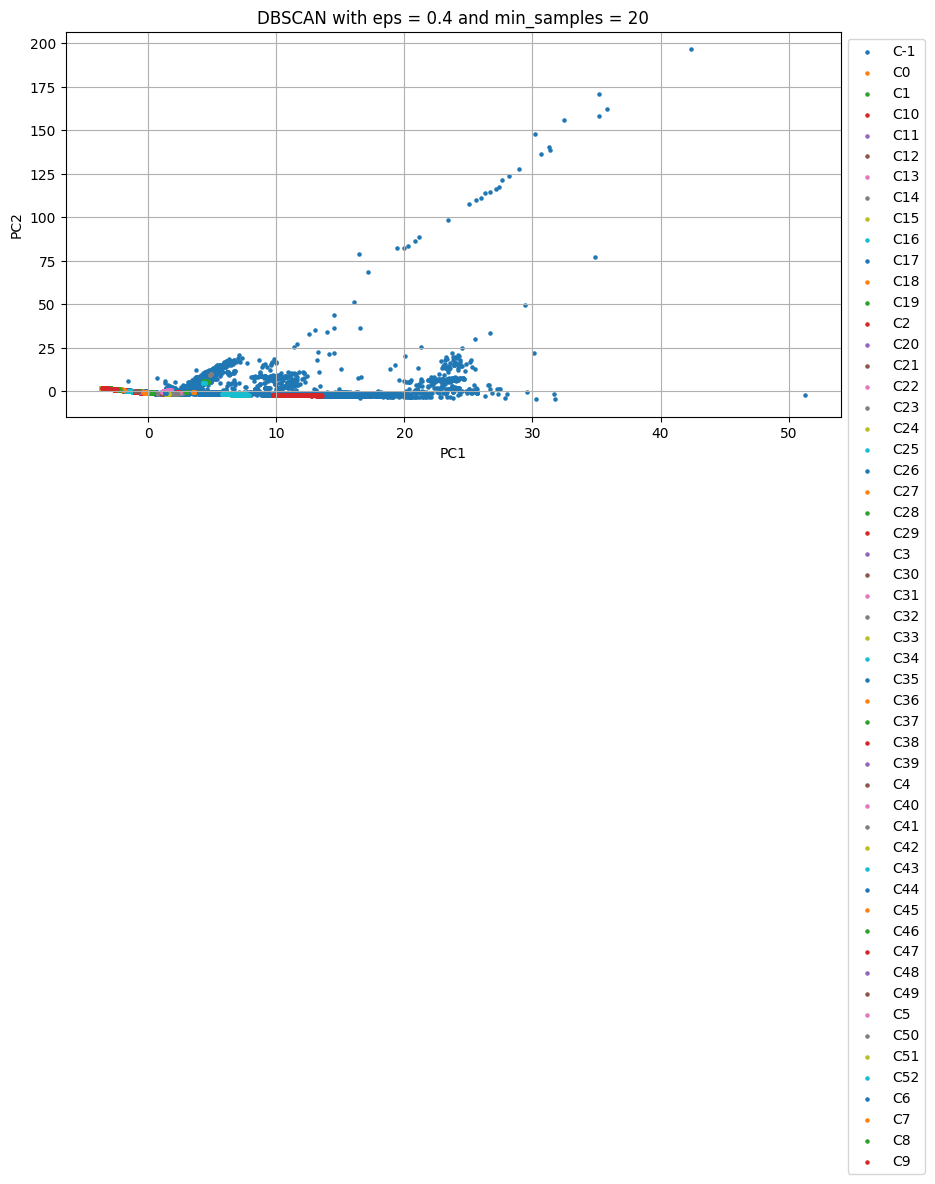

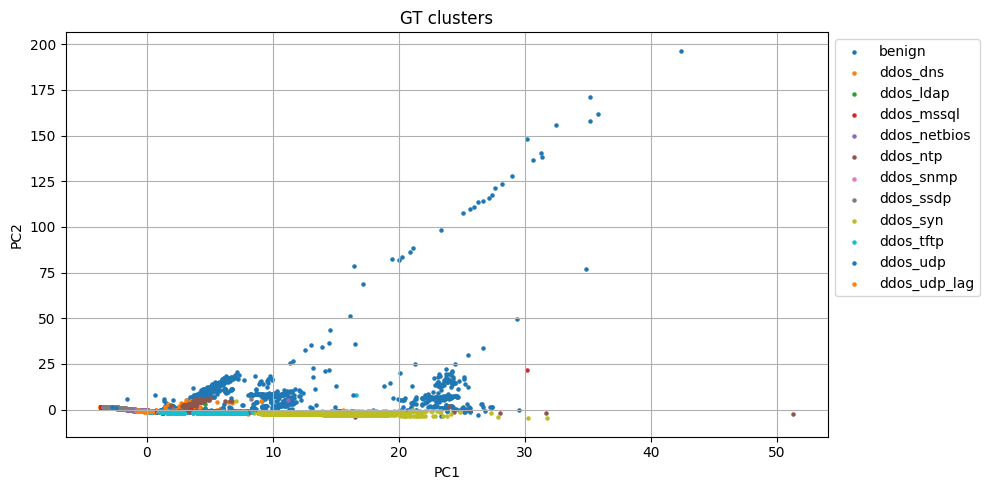

In [4]:
best_eps = 0.4
best_min = 20
dbscan = DBSCAN(eps=best_eps, min_samples=best_min)
labels = dbscan.fit_predict(pca_result)
df['cid_dbscan'] = [f'C{x}' for x in labels]
fig, ax = plt.subplots(figsize=(10,5))

for i in np.unique(df.cid_dbscan):
    subdf = df[df.cid_dbscan == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
ax.grid()
lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title(f'DBSCAN with eps = {best_eps} and min_samples = {best_min}')

fig, ax = plt.subplots(figsize=(10, 5))
for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
ax.grid()
lgnd = plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('GT clusters')

plt.tight_layout()
plt.show()

In [5]:
df[2] = pca_result[:, 2]
df

,0,1,cid_gmm,label,cid_dbscan,2
0,-0.640710,-0.460749,C8,ddos_dns,C-1,0.758035
1,-0.613198,-0.166611,C1,ddos_dns,C0,0.728001
2,-0.707778,-0.460524,C8,ddos_dns,C1,0.958055
3,-0.645403,-0.407969,C8,ddos_dns,C1,1.035004
4,-0.675533,-0.432180,C8,ddos_dns,C1,0.999314
...,...,...,...,...,...,...
64234,-0.559916,-0.766404,C5,ddos_udp_lag,C10,0.882152
64235,0.380449,-0.751165,C1,ddos_udp_lag,C19,1.683486
64236,-0.528554,-0.783802,C5,ddos_udp_lag,C10,0.928184
64237,0.381139,-0.733850,C1,ddos_udp_lag,C19,1.684241


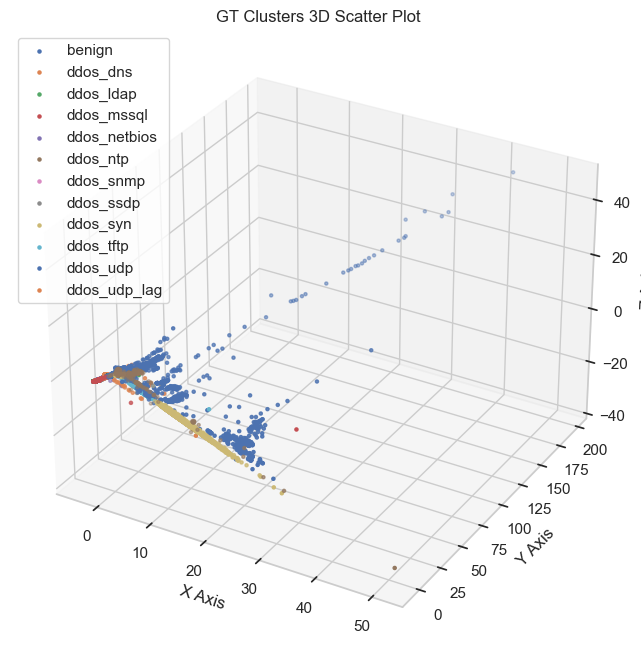

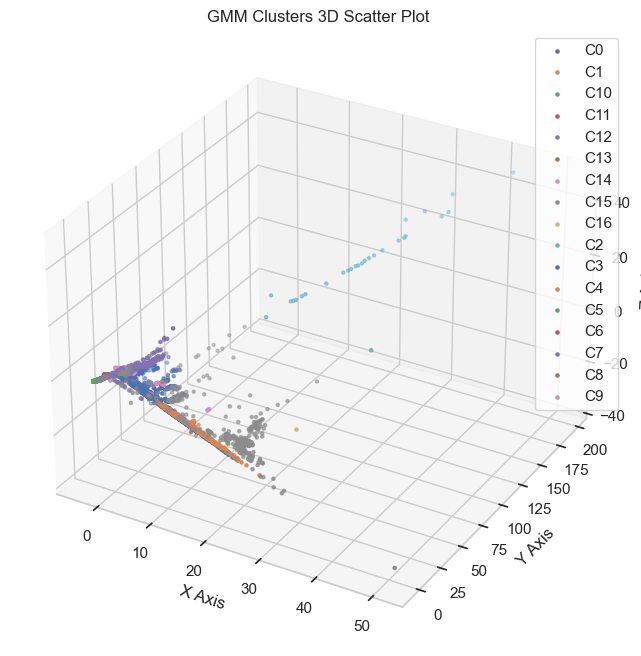

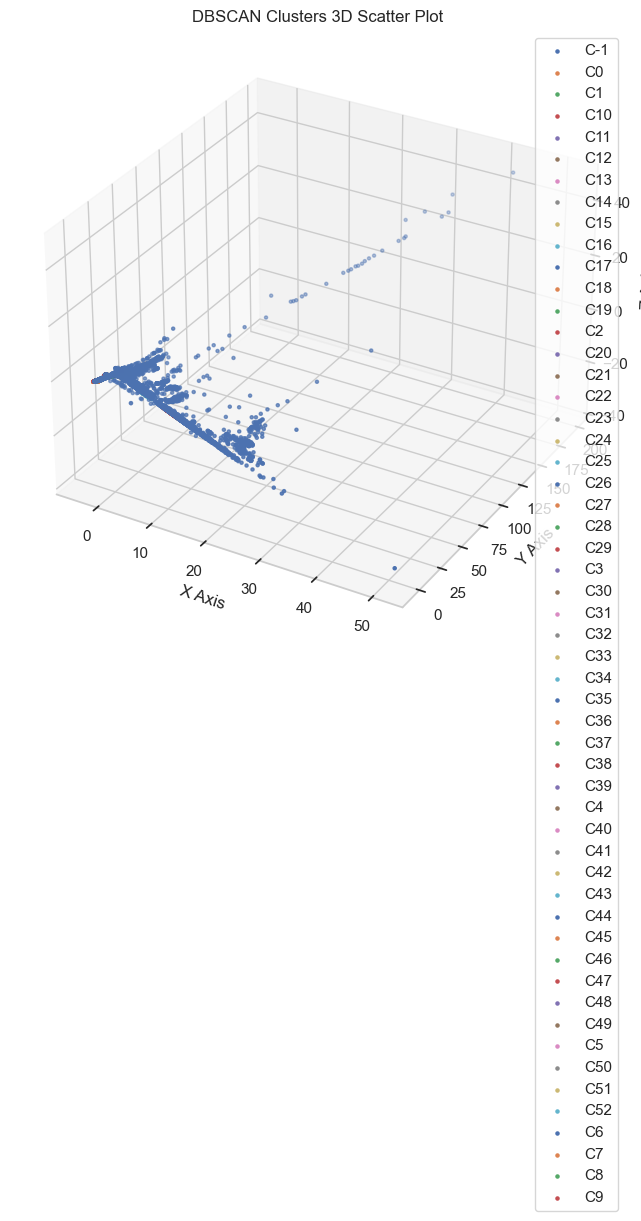

In [6]:
sns.set(style="whitegrid")
# Create a 3D scatter plot with color-coded clusters using Seaborn
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('GT Clusters 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(df.cid_gmm):
    subdf = df[df.cid_gmm == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('GMM Clusters 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(df.cid_dbscan):
    subdf = df[df.cid_dbscan == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('DBSCAN Clusters 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()

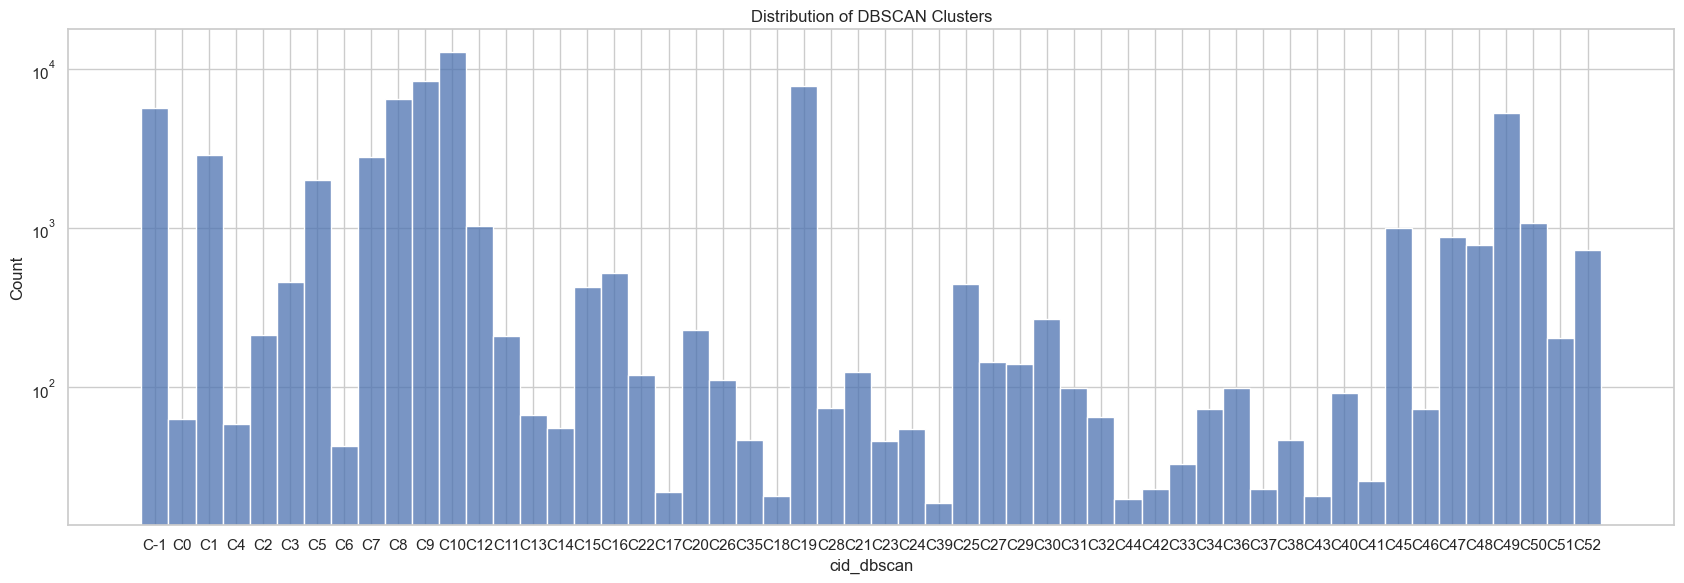

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


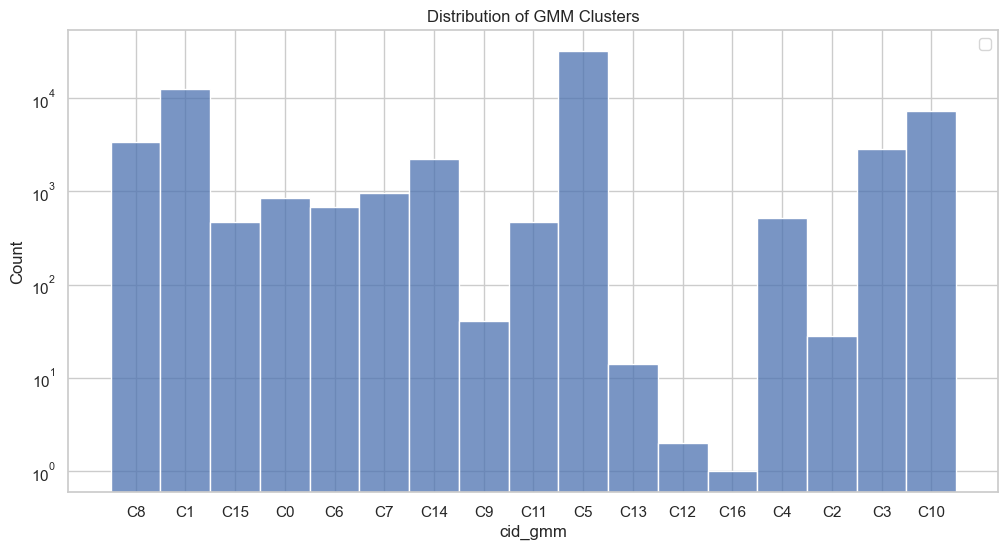

In [8]:
cluster_df = df

plt.figure(figsize=(17, 6))
sns.histplot(x='cid_dbscan', data=cluster_df)
plt.title('Distribution of DBSCAN Clusters')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize the distribution of GMM clusters
plt.figure(figsize=(12, 6))
sns.histplot(x='cid_gmm', data=cluster_df)
plt.legend()
plt.yscale('log')
plt.title('Distribution of GMM Clusters')
plt.show()

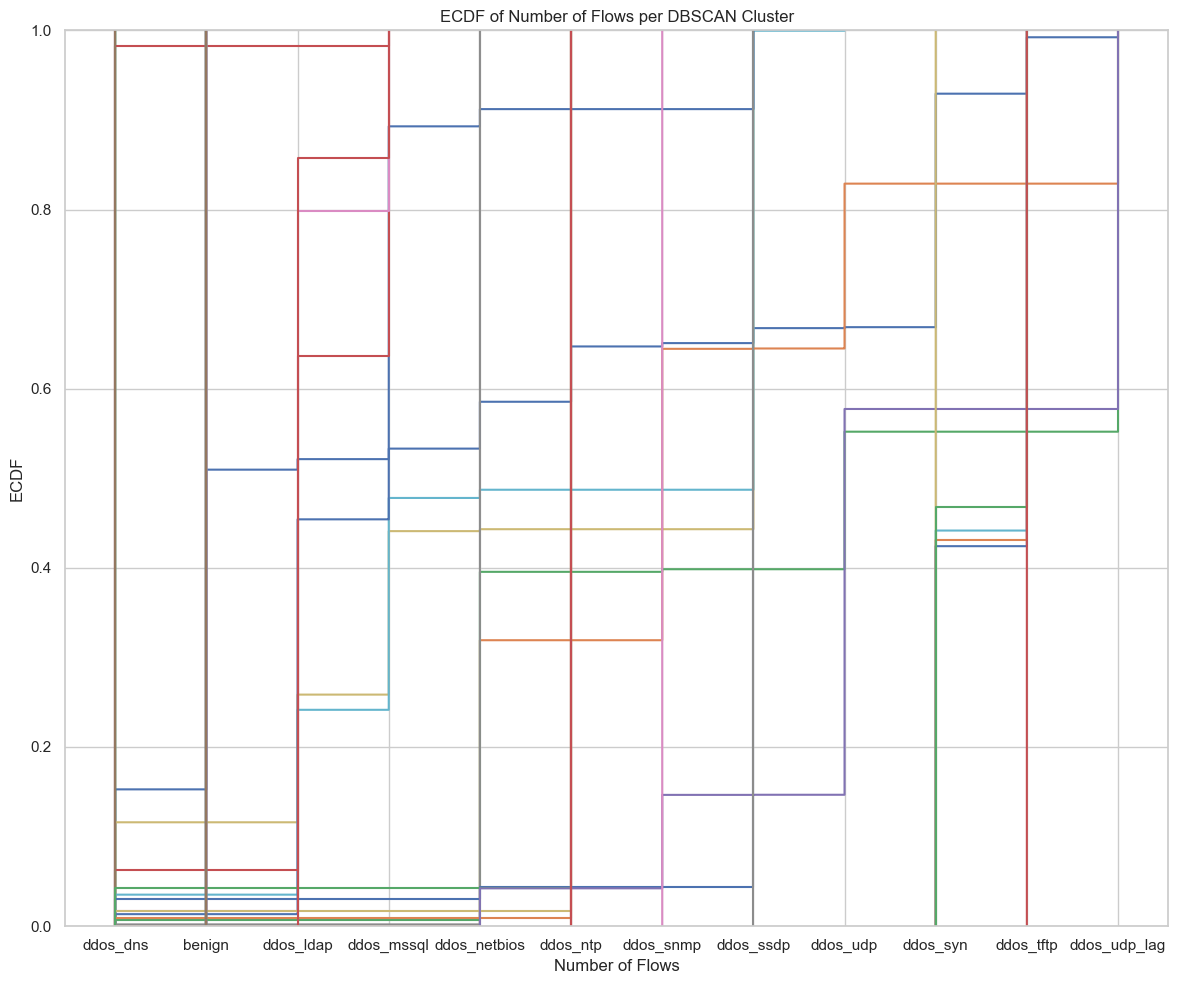

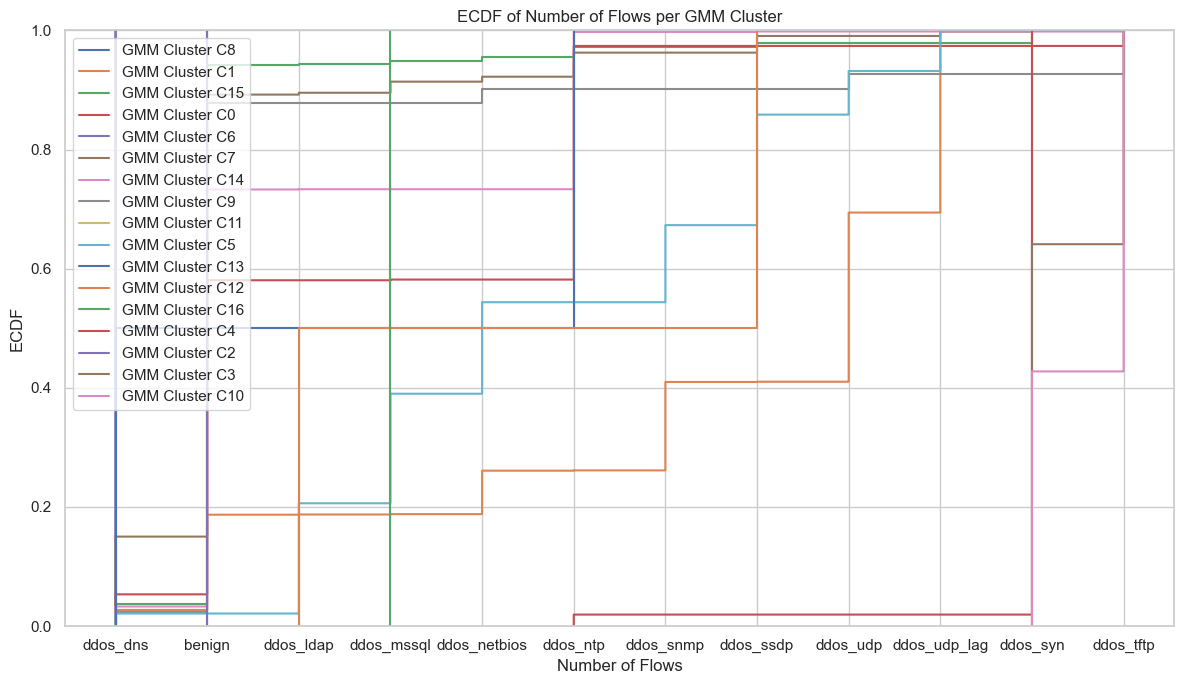

In [10]:
plt.figure(figsize=(12,10))
# DBSCAN
for label in cluster_df['cid_dbscan'].unique():
    flows_per_cluster = cluster_df[cluster_df['cid_dbscan'] == label]['label']  
    sns.ecdfplot(flows_per_cluster, label=f'DBSCAN Cluster {label}')


plt.title('ECDF of Number of Flows per DBSCAN Cluster')
plt.xlabel('Number of Flows')
plt.ylabel('ECDF')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,7))
# GMM
for label in cluster_df['cid_gmm'].unique():
    flows_per_cluster = cluster_df[cluster_df['cid_gmm'] == label]['label']  
    sns.ecdfplot(flows_per_cluster, label=f'GMM Cluster {label}')


plt.title('ECDF of Number of Flows per GMM Cluster')
plt.xlabel('Number of Flows')
plt.ylabel('ECDF')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('ddos_dataset.csv', low_memory=False)

x_df = df[df.columns.drop(['label','Flow ID', ' Source IP', ' Destination IP', 'SimillarHTTP'])]
x_df.set_index(' Timestamp', inplace=True)
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(x_df)
X_tsne = pd.DataFrame(X_tsne)
X_tsne['label'] = df['label']
X_tsne.to_csv('t_sne_dataframe', index=False)

fig, ax = plt.subplots()

for i in np.unique(X_tsne.label):
    subdf = X_tsne[X_tsne.label == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('t-SNE Scatter Plot')
plt.tight_layout()
plt.show()

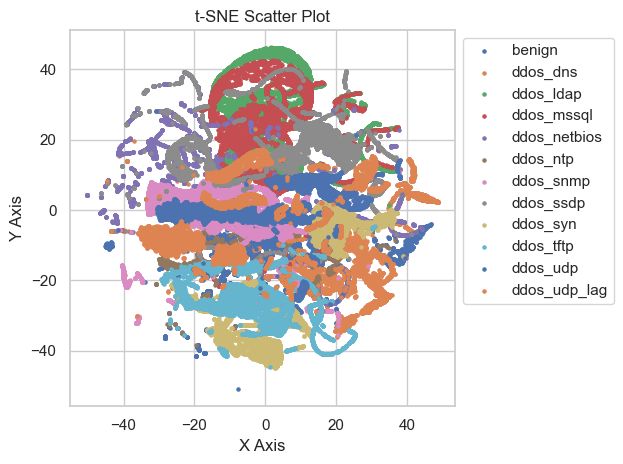

In [73]:
df_tsne = pd.read_csv('t_sne_dataframe', low_memory=False)
fig, ax = plt.subplots()

for i in np.unique(df_tsne.label):
    subdf = df_tsne[df_tsne.label == i]
    ax.scatter(subdf['0'], subdf['1'], label=i, s=5)
lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('t-SNE Scatter Plot')
plt.tight_layout()
plt.show()

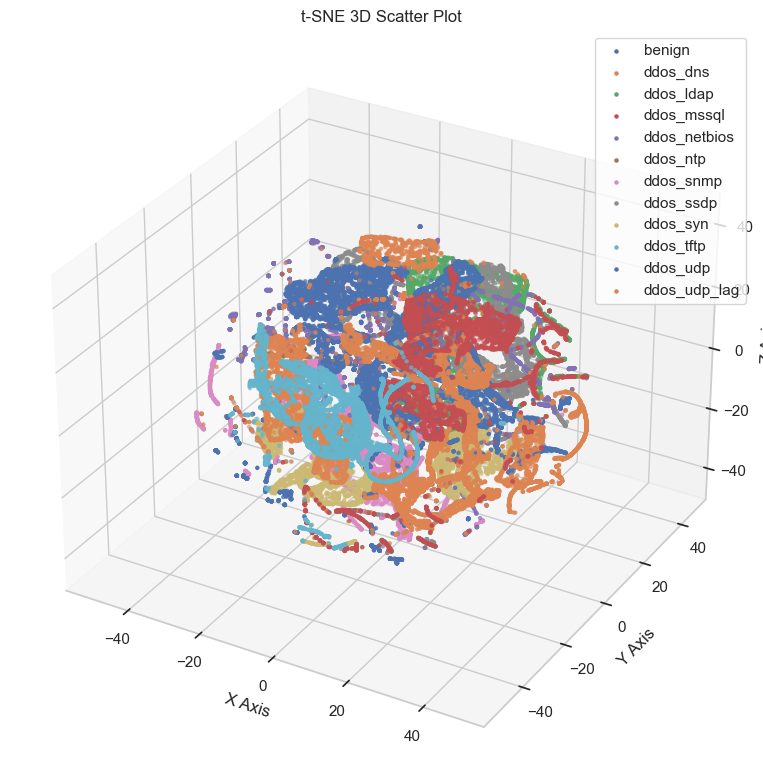

In [74]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in np.unique(df_tsne.label):
    subdf = df_tsne[df_tsne.label == i]
    ax.scatter(subdf['0'], subdf['1'], subdf['2'], label=i, s=5)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('t-SNE 3D Scatter Plot')
ax.legend()
plt.tight_layout()
plt.show()